# Lung Disease Multi-class Classification
# - Task 1: Exploratory Data Analysis (EDA)
- Dataset: lung_disease_v1.csv
- Target variable: disease_type



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/lung_disease_v1.csv")
df.head()

,patient_id,age,sex,bmi,smoking_status,pack_years,pm25_exposure,occupation,family_history,cough,...,dlco_pct_pred,cxr_finding,ct_nodule_size_mm,ct_emphysema_pct,sixmwd_m,hypertension,diabetes,hospital_visits_last_year,disease_type,severity
0,1,49,Male,20.1,Never,21.0,20.8,Office,NaN,1,...,82.1,Normal,3.0,11.9,447,1,1,0,Asthma,Moderate
1,2,61,Female,28.4,Current,34.1,10.8,Office,NaN,0,...,81.1,Normal,5.9,2.1,394,0,0,0,Lung Cancer,Mild/None
2,3,70,Male,22.2,Current,15.7,12.0,Manufacturing,NaN,1,...,85.4,Consolidation,2.8,4.8,309,0,1,0,Pneumonia,Mild/None
3,4,47,Male,23.1,Current,49.0,20.0,Manufacturing,NaN,0,...,49.0,Normal,1.8,29.4,190,0,0,0,COPD,Moderate
4,5,70,Female,29.0,Former,6.0,6.0,Office,NaN,0,...,81.6,Normal,1.0,9.5,314,0,0,0,Healthy,Mild/None


In [62]:
# Choose target variable
target = "disease_type"

# Split into feature groups
# Select all numerical columns (integers and floats)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
# Select all categorical (text/object) columns
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Remove ID columns from EDA summaries if needed
if "patient_id" in num_cols:
    num_cols.remove("patient_id")

# 1) Investigate distribution of chosen target variable
print("=== Target distribution (counts) ===")
# Count how many samples belong to each disease category
print(df[target].value_counts())
print("\n=== Target distribution (percentage) ===")
# Calculate class proportions instead of raw counts
# normalize=True converts counts into percentages
# round(3) limits values to 3 decimal places for readability
print(df[target].value_counts(normalize=True).round(3))

=== Target distribution (counts) ===
disease_type
Healthy        4243
COPD           2147
Asthma         1968
Pneumonia      1861
Lung Cancer    1781
Name: count, dtype: int64

=== Target distribution (percentage) ===
disease_type
Healthy        0.354
COPD           0.179
Asthma         0.164
Pneumonia      0.155
Lung Cancer    0.148
Name: proportion, dtype: float64


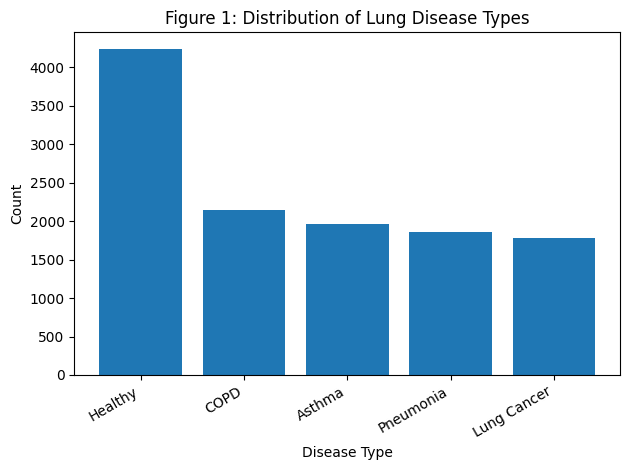

In [63]:
# Bar chart for target distribution
plt.figure()
# Store class counts in a variable for reuse
counts = df[target].value_counts()
# Create a bar chart:
# X-axis = disease categories
# Y-axis = number of samples
plt.bar(counts.index.astype(str), counts.values)
# Add a descriptive title
plt.title("Figure 1: Distribution of Lung Disease Types")
plt.xlabel("Disease Type")
plt.ylabel("Count")
# Rotate x-axis labels to prevent overlap
# ha="right" aligns labels neatly
plt.xticks(rotation=30, ha="right")
# Automatically adjust spacing so labels are not cut off
plt.tight_layout()
plt.show()

In [64]:
# 2) Descriptive statistics for key numerical features (mean, median, standard deviation)
# Select key numeric features
key_numeric = [
    "age", "bmi", "pack_years", "pm25_exposure",
    "fev1_fvc", "fev1_pct_pred",
    "spo2", "sixmwd_m",
    "crp_mg_L", "wbc_10e9_L",
    "ct_nodule_size_mm", "ct_emphysema_pct"
]

# Keep only those that actually exist in the dataset
key_numeric = [c for c in key_numeric if c in df.columns]

# Create a DataFrame containing descriptive statistics
desc_stats = pd.DataFrame({
    "Mean": df[key_numeric].mean(numeric_only=True),
    "Median": df[key_numeric].median(numeric_only=True),
    "StdDev": df[key_numeric].std(numeric_only=True)
}).round(3)

# Print header in output
print("\n=== Descriptive statistics (Mean/Median/StdDev) ===")
# Display the descriptive statistics table
print(desc_stats)


=== Descriptive statistics (Mean/Median/StdDev) ===
                      Mean  Median   StdDev
age                 58.071   58.00   14.742
bmi                 27.009   27.00    4.962
pack_years          14.768   10.30   14.848
pm25_exposure       15.114   15.00    6.689
fev1_fvc             0.741    0.75    0.100
fev1_pct_pred       83.806   85.10   18.774
spo2                95.963   96.00    2.376
sixmwd_m           403.809  405.00  109.520
crp_mg_L            20.793   10.30   30.606
wbc_10e9_L           8.097    7.80    2.607
ct_nodule_size_mm    4.644    3.00    5.926
ct_emphysema_pct     8.276    6.30    8.290


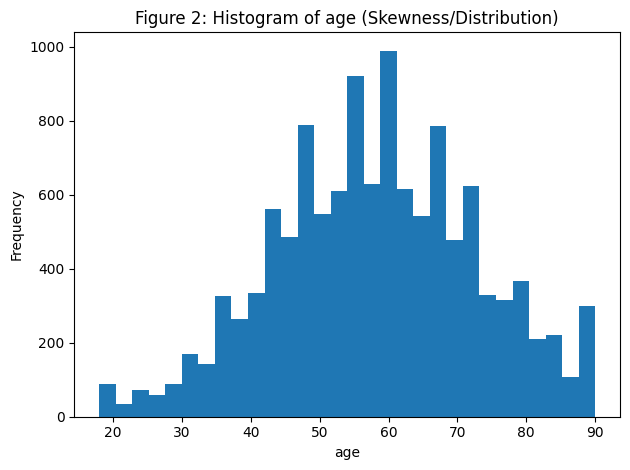

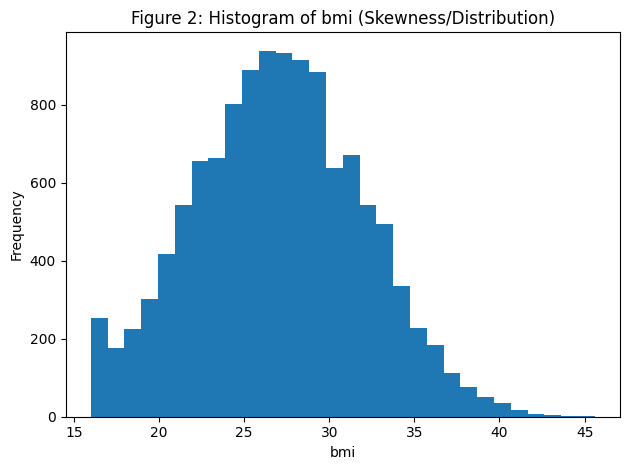

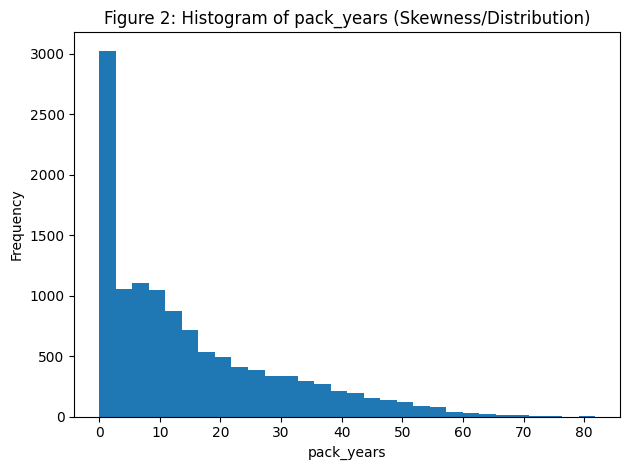

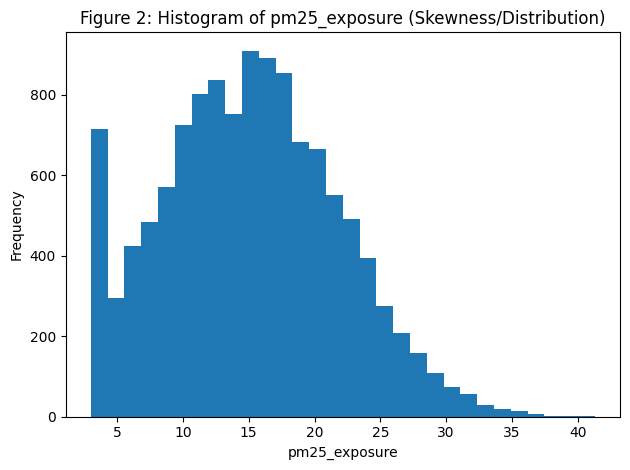

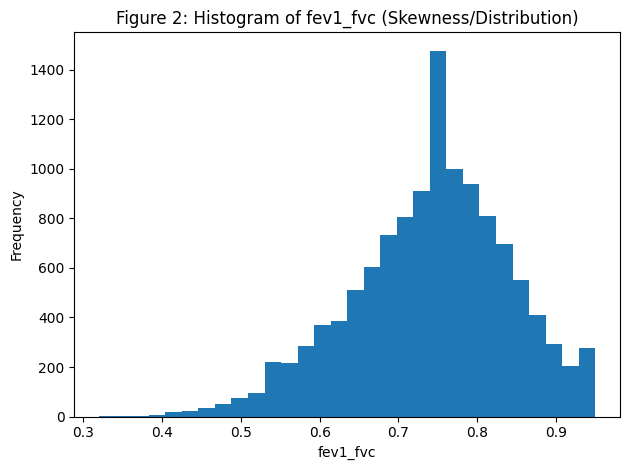

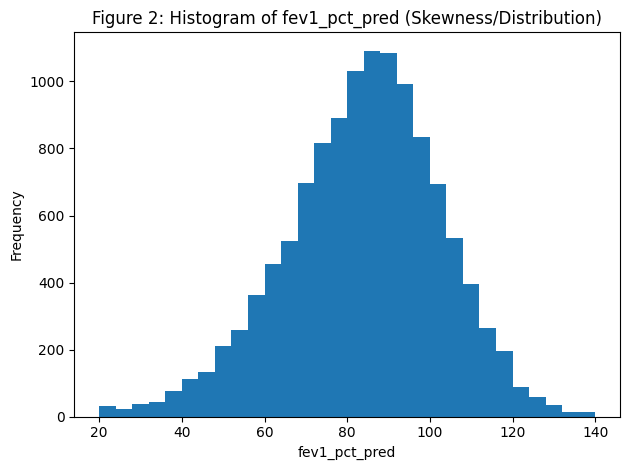

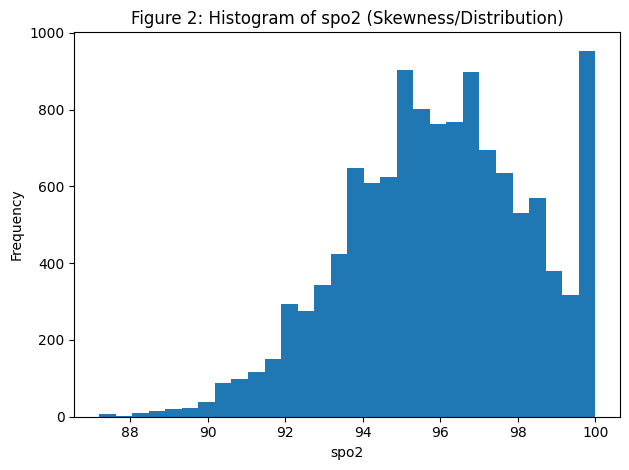

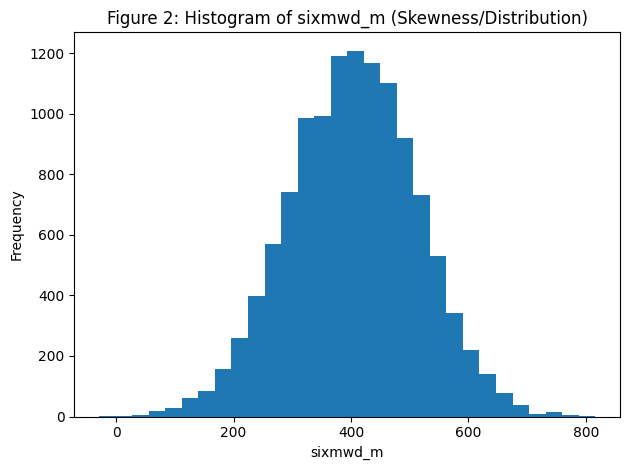

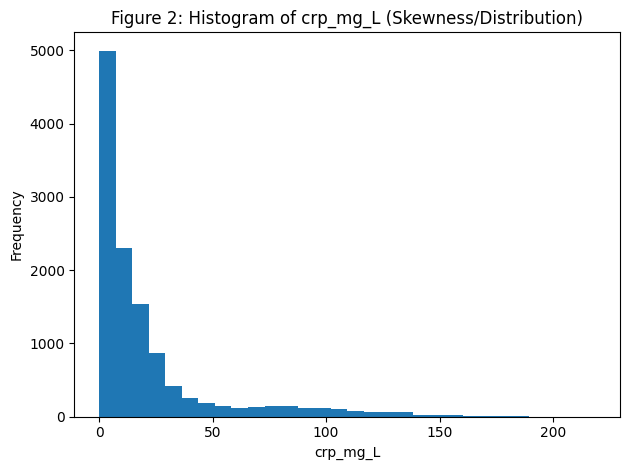

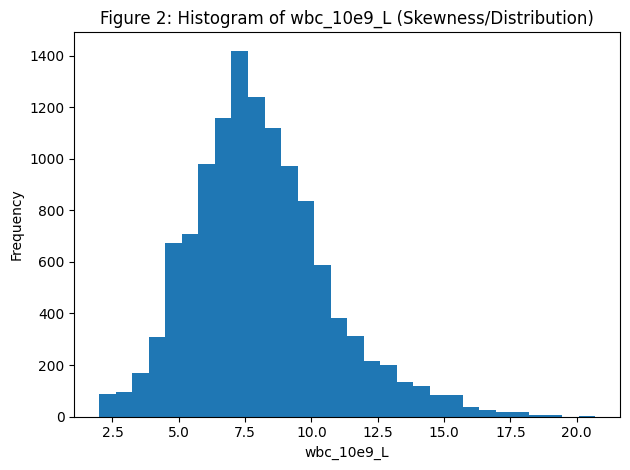

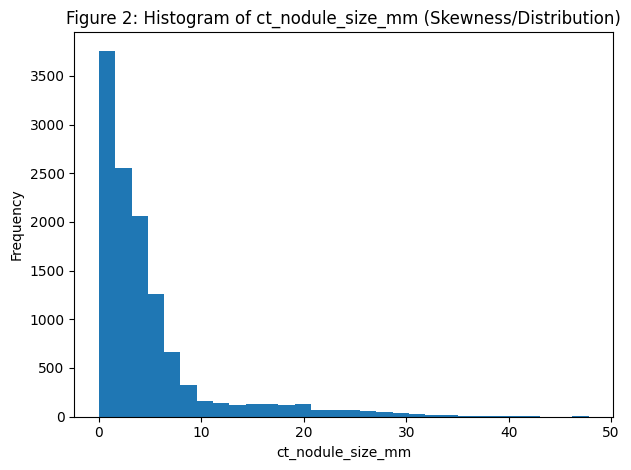

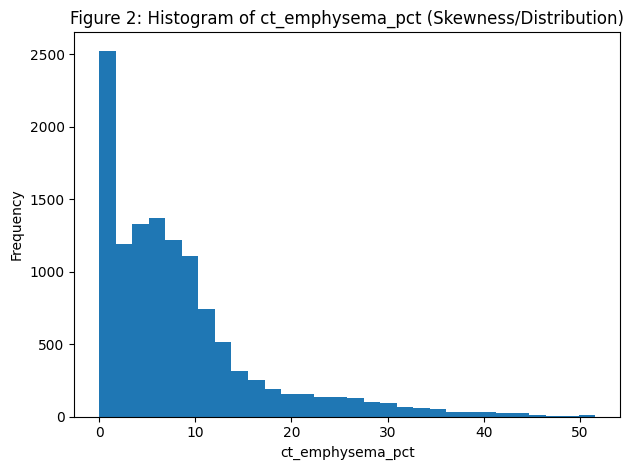

In [65]:
# 3) Visualisations: histograms, boxplots to identify trends, outliers, skewness
# Histograms (skewness + distribution shape)
# Loop through each selected numerical feature
for col in key_numeric:
    # Create a new figure for each histogram
    plt.figure()
    # Plot histogram of the selected column
    # dropna() removes missing values to avoid plotting errors
    # bins=30 gives balanced granularity for distribution analysis
    plt.hist(df[col].dropna(), bins=30)
    # Add descriptive title
    plt.title(f"Figure 2: Histogram of {col} (Skewness/Distribution)")
    # Label x-axis with feature name
    plt.xlabel(col)
    # Label y-axis as frequency count
    plt.ylabel("Frequency")
    # Adjust layout to prevent label clipping
    plt.tight_layout()
    # Display the histogram
    plt.show()

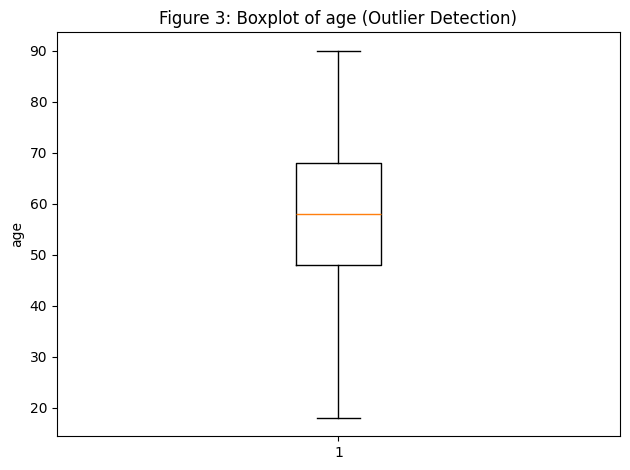

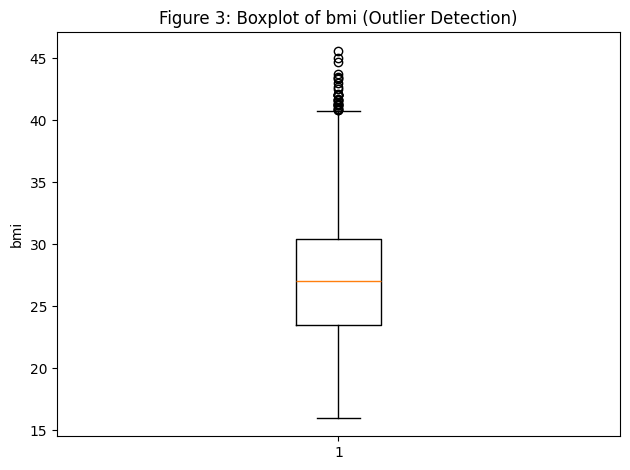

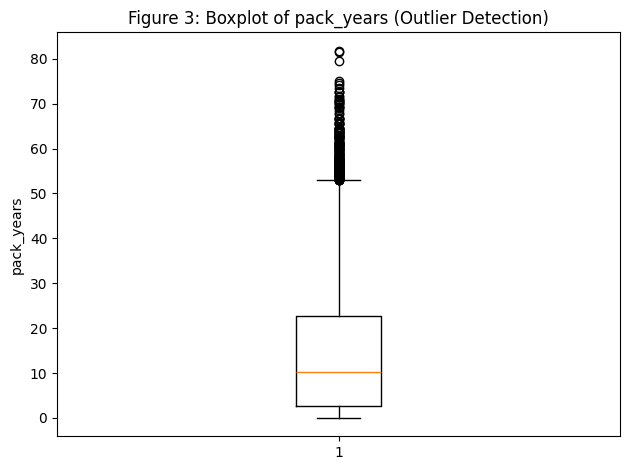

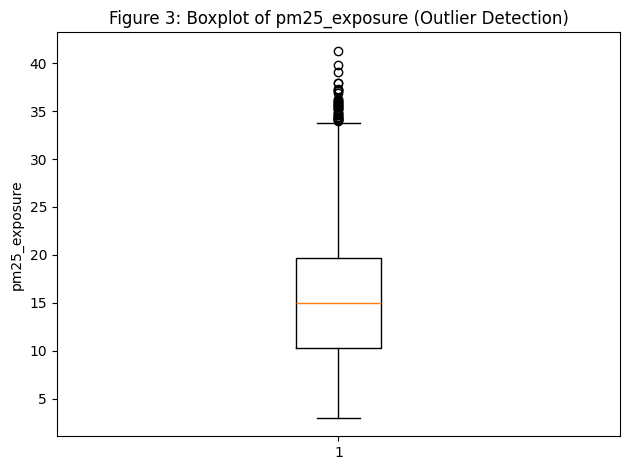

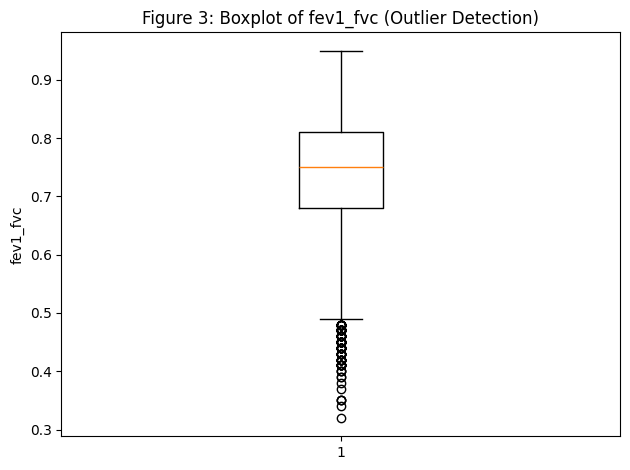

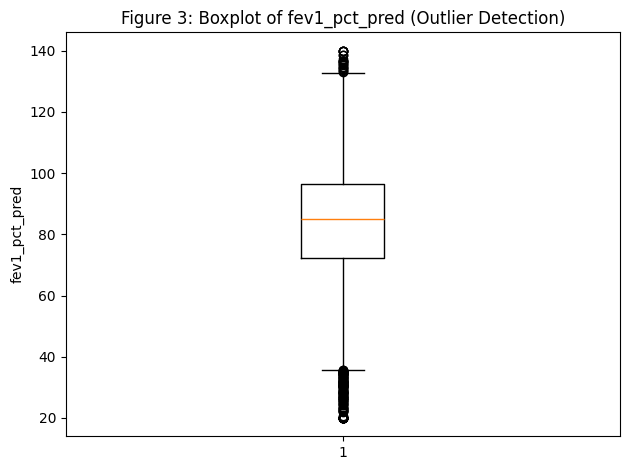

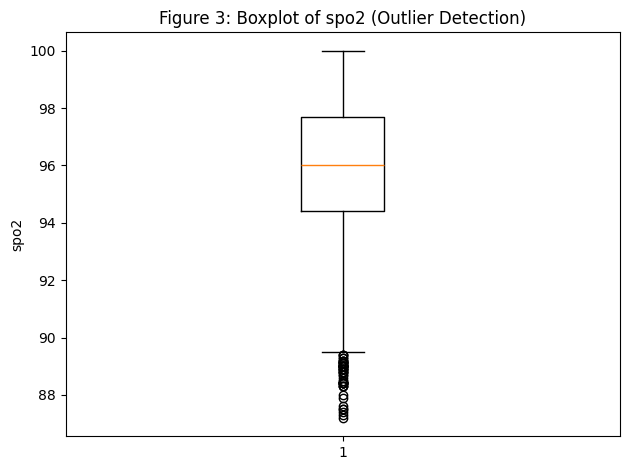

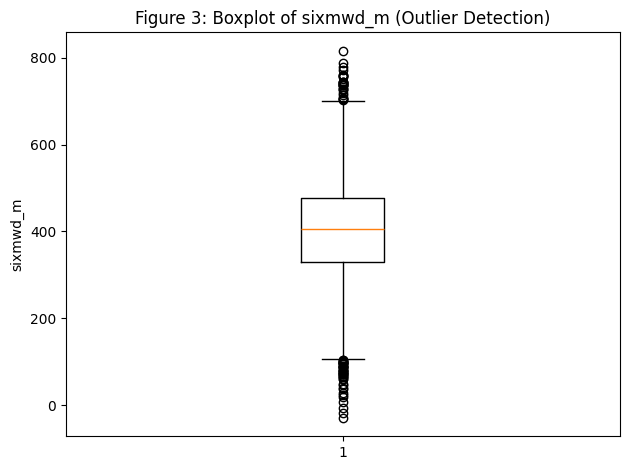

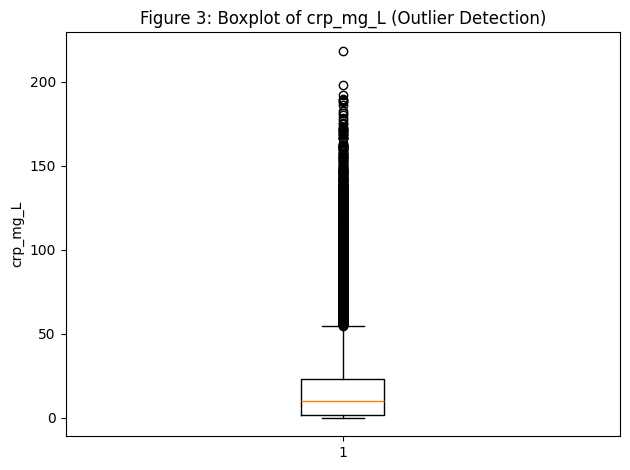

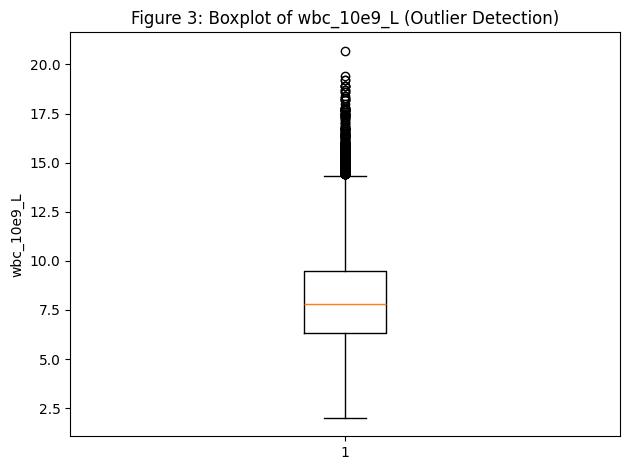

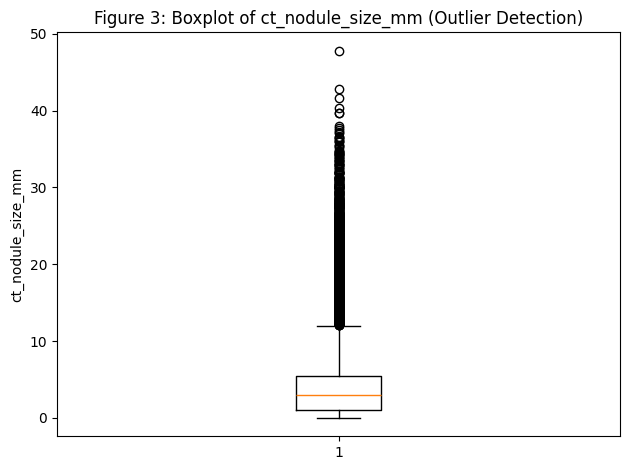

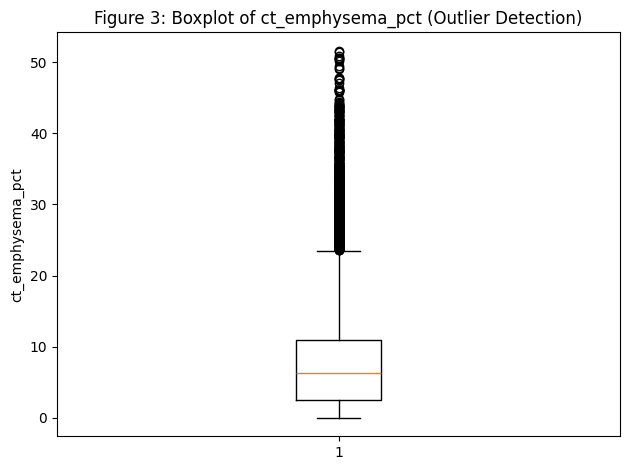

In [66]:
# Boxplots for outlier detection
# Loop through each selected numerical feature
for col in key_numeric:
    plt.figure()
    # Create a boxplot for the selected feature
    # dropna() removes missing values to avoid distortion
    # vert=True ensures vertical orientation (default)
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Figure 3: Boxplot of {col} (Outlier Detection)")
    plt.ylabel(col)
    # Adjust spacing to prevent clipping
    plt.tight_layout()
    # Display the boxplot
    plt.show()

/tmp/ipython-input-2898627217.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


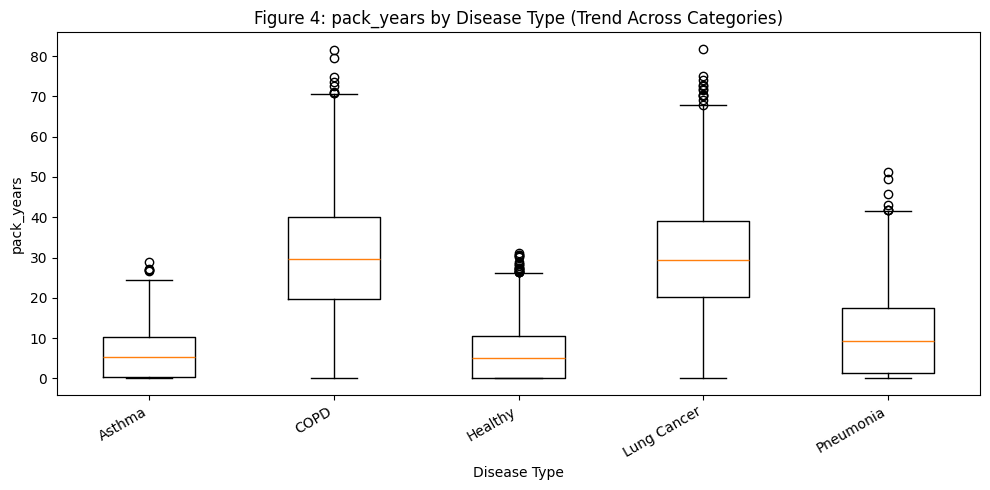

In [67]:
# Disease-stratified boxplot (Compare smoking exposure across disease categories)
# Example: pack_years by disease_type (strong clinical association)
# Check if pack_years exists in dataset (robustness check)
if "pack_years" in df.columns:
    # Create empty lists to store grouped values and labels
    groups, labels = [], []
    # Group dataset by disease type
    # cls = disease category
    # sub = subset of rows for that disease
    for cls, sub in df.groupby(target):
        # Append pack_years values (without NaNs) for each disease
        groups.append(sub["pack_years"].dropna())
        # Store disease name for x-axis labeling
        labels.append(str(cls))

    # Create figure with specified size for better readability
    plt.figure(figsize=(10, 5))
    # Create grouped boxplot
    plt.boxplot(groups, labels=labels)
    plt.title("Figure 4: pack_years by Disease Type (Trend Across Categories)")
    # Label axes clearly
    plt.xlabel("Disease Type")
    plt.ylabel("pack_years")
    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

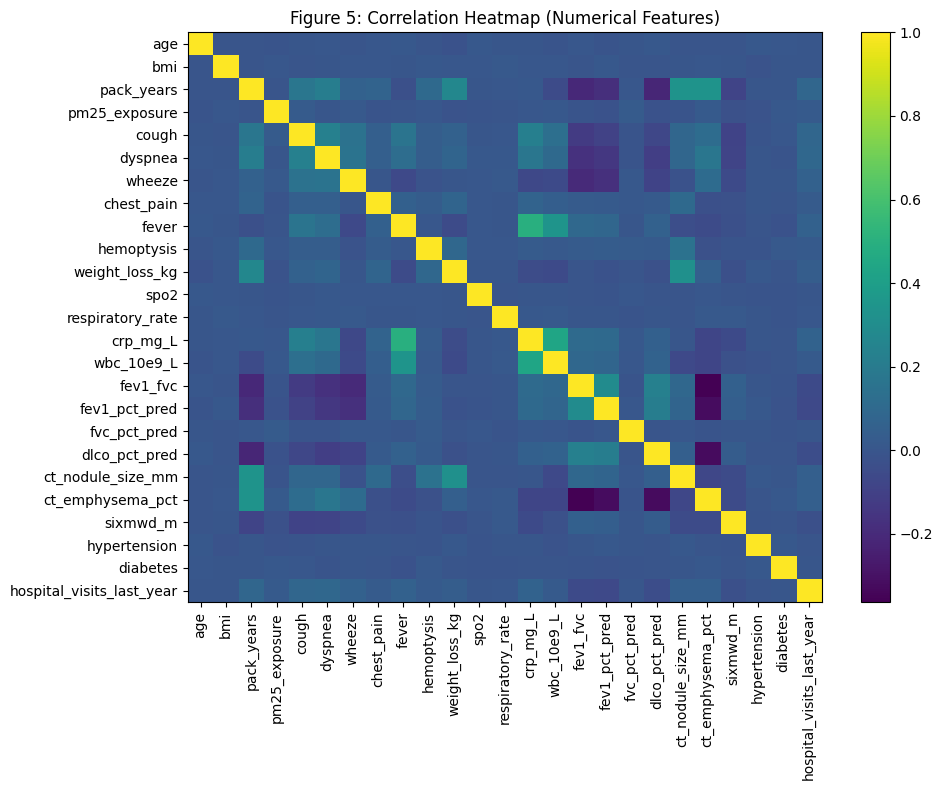

In [68]:
# 4) Explore correlations between numerical features and target (Correlation heatmap + group means)
# Compute correlation matrix among numerical columns
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
# Display correlation matrix as image
# aspect="auto" adjusts cell proportions
plt.imshow(corr.values, aspect="auto")
plt.title("Figure 5: Correlation Heatmap (Numerical Features)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
# Add color bar to interpret correlation strength
plt.colorbar()
plt.tight_layout()
# Show heatmap
plt.show()

In [69]:
# Group-wise mean table: numeric features by disease class
# To interpret which features differ most by target class
# Calculate mean of selected numeric features grouped by disease
# numeric_only=True prevents non-numeric interference
# round(3) improves readability for academic presentation
group_means = df.groupby(target)[key_numeric].mean(numeric_only=True).round(3)

print("\n=== Mean of numeric features by disease category ===")
# Display grouped mean table
print(group_means)


=== Mean of numeric features by disease category ===
                 age     bmi  pack_years  pm25_exposure  fev1_fvc  \
disease_type                                                        
Asthma        58.216  26.954       6.232         15.085     0.709   
COPD          57.821  27.052      30.009         15.424     0.629   
Healthy       58.129  26.964       6.341         15.022     0.779   
Lung Cancer   57.883  26.985      29.772         14.868     0.780   
Pneumonia     58.253  27.140      11.064         15.233     0.777   

              fev1_pct_pred    spo2  sixmwd_m  crp_mg_L  wbc_10e9_L  \
disease_type                                                          
Asthma               78.279  96.026   389.815     7.233       7.495   
COPD                 65.467  96.005   389.088    13.501       7.429   
Healthy              90.133  95.909   429.301     6.991       7.465   
Lung Cancer          90.199  95.949   390.159    18.343       7.541   
Pneumonia            90.262  95.983 

In [70]:
# 5) Identify features strongly linked to specific disease categories (simple, transparent approach)
# Calculate overall mean across all patients
overall_means = df[key_numeric].mean(numeric_only=True)

# Compute difference (class mean - overall mean)
diff_from_overall = (group_means - overall_means).round(3)

print("\n=== Class mean difference from overall mean (signals feature linkage) ===")
# Display difference table
print(diff_from_overall)


=== Class mean difference from overall mean (signals feature linkage) ===
                age    bmi  pack_years  pm25_exposure  fev1_fvc  \
disease_type                                                      
Asthma        0.145 -0.055      -8.536         -0.029    -0.032   
COPD         -0.250  0.043      15.241          0.310    -0.112   
Healthy       0.058 -0.045      -8.427         -0.092     0.038   
Lung Cancer  -0.188 -0.024      15.004         -0.246     0.039   
Pneumonia     0.182  0.131      -3.704          0.119     0.036   

              fev1_pct_pred   spo2  sixmwd_m  crp_mg_L  wbc_10e9_L  \
disease_type                                                         
Asthma               -5.527  0.063   -13.994   -13.560      -0.602   
COPD                -18.339  0.042   -14.721    -7.292      -0.668   
Healthy               6.327 -0.054    25.492   -13.802      -0.632   
Lung Cancer           6.393 -0.014   -13.650    -2.450      -0.556   
Pneumonia             6.456  0.020 

In [71]:
# Show top 5 strongest positive/negative differences per disease category
# Loop through each disease category in the difference table
for disease in diff_from_overall.index:
    print(f"\n--- Strongest feature signals for: {disease} ---")


--- Strongest feature signals for: Asthma ---

--- Strongest feature signals for: COPD ---

--- Strongest feature signals for: Healthy ---

--- Strongest feature signals for: Lung Cancer ---

--- Strongest feature signals for: Pneumonia ---


In [72]:
# Sort features by absolute difference (strongest deviations)
# Take absolute values of differences for this disease
# abs() is used because we care about magnitude of difference, not just whether it is positive or negative
abs_sorted = diff_from_overall.loc[disease].abs().sort_values(ascending=False)

# Select top 5 features with largest deviation from overall mean
# head(5) returns first 5 highest values
top_features = abs_sorted.head(5).index.tolist()
# Print the actual signed differences for interpretation
print(diff_from_overall.loc[disease, top_features])

crp_mg_L         56.568
sixmwd_m        -13.273
fev1_pct_pred     6.456
pack_years       -3.704
wbc_10e9_L        3.380
Name: Pneumonia, dtype: float64


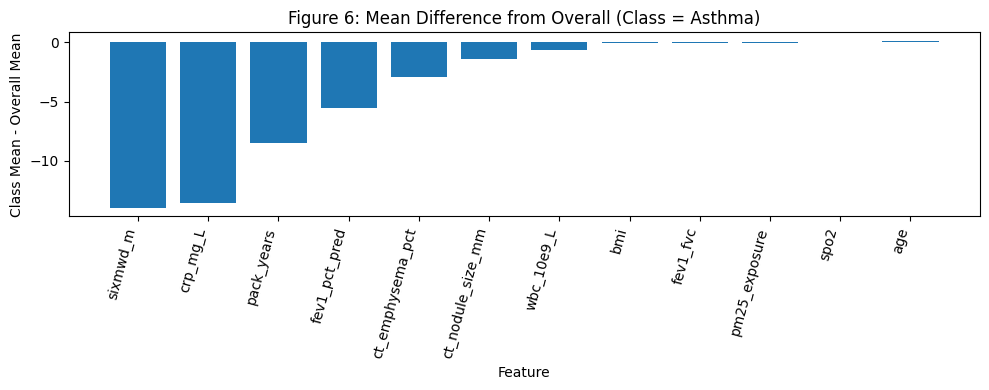

In [74]:
# Visualise mean differences for one class (Asthma)
# Select the first disease class in the index
example_class = diff_from_overall.index[0]
# Sort feature differences for that class
# sort_values() orders features from lowest to highest deviation
vals = diff_from_overall.loc[example_class].sort_values()

plt.figure(figsize=(10, 4))
# Create bar chart:
# X-axis = feature names
# Y-axis = deviation from overall mean
plt.bar(vals.index.astype(str), vals.values)
plt.title(f"Figure 6: Mean Difference from Overall (Class = {example_class})")
plt.xlabel("Feature")
plt.ylabel("Class Mean - Overall Mean")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
# Display final visualisation
plt.show()

# - Task 2: Data Preparation

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("/content/lung_disease_v1.csv")
# Define y as the target vector (labels) for supervised learning
y = df[target]

# Remove identifier + leakage columns from features
# patient_id is only an ID (no clinical meaning)
# severity is often derived after diagnosis → risk of leakage
# Define X as the feature matrix
X = df.drop(columns=[target, "patient_id", "severity"], errors="ignore")

# 1) Identify missing values + chosen handling method
# Count missing values per column (before handling)
missing_counts = X.isna().sum().sort_values(ascending=False)
# Keep only columns that actually have missing values, and show top 15 for readability
missing_cols = missing_counts[missing_counts > 0].head(15)

print("=== Missing values per column (Before handling) ===")
# Display missing-value summary
print(missing_cols)

=== Missing values per column (Before handling) ===
family_history    7176
dtype: int64


In [76]:
# 2) Encode categorical variables appropriately
# Identify categorical columns (text/object data types)
cat_cols = X.select_dtypes(include="object").columns.tolist()
# Identify numerical columns (integers + floats)
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Remove any accidental IDs from numeric list
if "patient_id" in num_cols:
    num_cols.remove("patient_id")

# Special categorical column: family_history (high missingness is meaningful)
cat_fh = ["family_history"] if "family_history" in cat_cols else []
# All other categorical columns except family_history
cat_other = [c for c in cat_cols if c not in cat_fh]

# Print detected categorical feature names
print("\nCategorical columns:", cat_cols)
# Print number of numerical columns
print("Numerical columns count:", len(num_cols))

# Show raw category values before encoding (string form)
if "smoking_status" in X.columns:
    print("\n=== Before Encoding: smoking_status unique values ===")
    print(X["smoking_status"].dropna().unique())


Categorical columns: ['sex', 'smoking_status', 'occupation', 'family_history', 'cxr_finding']
Numerical columns count: 25

=== Before Encoding: smoking_status unique values ===
['Never' 'Current' 'Former']


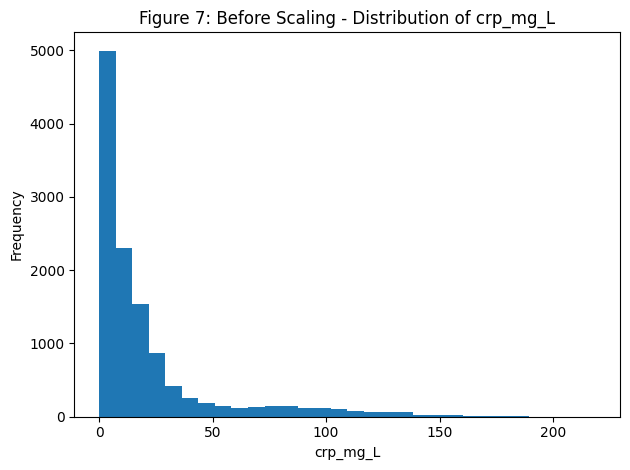

In [77]:
# 3) Apply scaling to numerical variables
# Choose one numeric feature to demonstrate scaling effect
demo_num = "crp_mg_L" if "crp_mg_L" in num_cols else (num_cols[0] if len(num_cols) else None)
# If a demo numeric feature exists, plot its distribution Before scaling
if demo_num:
    plt.figure()
    # histogram; dropna removes missing values
    plt.hist(X[demo_num].dropna(), bins=30)
    plt.title(f"Figure 7: Before Scaling - Distribution of {demo_num}")
    plt.xlabel(demo_num)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [78]:
# 4) Build preprocessing pipeline (impute + encode + scale)
# Numeric pipeline: median imputation + scaling
num_pipe = Pipeline(steps=[
    # replace missing numeric values with median
    ("imputer", SimpleImputer(strategy="median")),
    # standardise numeric values (mean 0, std 1)
    ("scaler", StandardScaler())
])

# Categorical pipeline (general): mode imputation + one-hot encoding
cat_other_pipe = Pipeline(steps=[
    # fill missing with mode
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # convert categories to binary columns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Family history pipeline: constant imputation + one-hot encoding
cat_fh_pipe = Pipeline(steps=[
    # treat missing as explicit category
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    # one-hot encode
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        # apply numeric pipeline to numeric columns
        ("num", num_pipe, num_cols),
        # apply categorical pipeline to general categorical cols
        ("cat_other", cat_other_pipe, cat_other),
        # apply special pipeline to family_history
        ("cat_fh", cat_fh_pipe, cat_fh),
    ],
    # drop any columns not listed above (ensures controlled feature set)
    remainder="drop"
)

In [79]:
# 5) Train-test split (stratified) before applying transforms
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Print training class proportions to confirm stratified split worked correctly
print("\n=== Class proportions (Train) ===")
print(y_train.value_counts(normalize=True).round(3))

# Print test class proportions for comparison
print("\n=== Class proportions (Test) ===")
print(y_test.value_counts(normalize=True).round(3))


=== Class proportions (Train) ===
disease_type
Healthy        0.354
COPD           0.179
Asthma         0.164
Pneumonia      0.155
Lung Cancer    0.148
Name: proportion, dtype: float64

=== Class proportions (Test) ===
disease_type
Healthy        0.354
COPD           0.179
Asthma         0.164
Pneumonia      0.155
Lung Cancer    0.148
Name: proportion, dtype: float64


In [80]:
# 6) Fit preprocess on Train only and transform Train/Test
preprocess.fit(X_train)

# Transform training features into model-ready numeric matrix
X_train_t = preprocess.transform(X_train)
# Transform test features using the same fitted preprocessing
X_test_t = preprocess.transform(X_test)

# Show output shape after encoding/scaling
print("\n=== After Preprocessing: transformed shapes ===")
print("X_train_t shape:", X_train_t.shape)
print("X_test_t shape:", X_test_t.shape)

# Show new feature names after one-hot encoding
feature_names = preprocess.get_feature_names_out()

# After encoding example: show the new one-hot columns created for smoking_status
if "smoking_status" in X.columns:
  #Identify one-hot encoded smoking_status columns
  encoded_smoking_cols = [
      f for f in feature_names if "smoking_status" in f
  ]

  # Print new encoded column names (this is the “after encoding” evidence)
  print("\n=== After Encoding: smoking_status one-hot encoded columns ===")
  print(encoded_smoking_cols)

  # Show unique values in transformed matrix (should be 0 and 1)
  # Transform only training set for demonstration
  X_train_transformed = preprocess.transform(X_train)

  # Show unique values for each encoded column
  for col in encoded_smoking_cols:
      # Find index of this encoded feature in the transformed matrix
      col_index = list(feature_names).index(col)

      # Extract column values
      col_values = X_train_transformed[:, col_index]
      # If matrix is sparse, convert to dense array for analysis
      if hasattr(col_values, "toarray"):
          col_values = col_values.toarray().ravel()
      else:
          col_values = np.array(col_values).ravel()

      # Print the unique values (expected: [0. 1.])
      print(f"\nAfter Encoding: {col} unique values →", np.unique(col_values))

# Print a sample of transformed feature names to show how preprocessing changed the dataset
print("\n=== After Encoding: sample transformed feature names ===")
print(feature_names[:25])


=== After Preprocessing: transformed shapes ===
X_train_t shape: (9600, 49)
X_test_t shape: (2400, 49)

=== After Encoding: smoking_status one-hot encoded columns ===
['cat_other__smoking_status_Current', 'cat_other__smoking_status_Former', 'cat_other__smoking_status_Never']

After Encoding: cat_other__smoking_status_Current unique values → [0. 1.]

After Encoding: cat_other__smoking_status_Former unique values → [0. 1.]

After Encoding: cat_other__smoking_status_Never unique values → [0. 1.]

=== After Encoding: sample transformed feature names ===
['num__age' 'num__bmi' 'num__pack_years' 'num__pm25_exposure' 'num__cough'
 'num__dyspnea' 'num__wheeze' 'num__chest_pain' 'num__fever'
 'num__hemoptysis' 'num__weight_loss_kg' 'num__spo2'
 'num__respiratory_rate' 'num__crp_mg_L' 'num__wbc_10e9_L' 'num__fev1_fvc'
 'num__fev1_pct_pred' 'num__fvc_pct_pred' 'num__dlco_pct_pred'
 'num__ct_nodule_size_mm' 'num__ct_emphysema_pct' 'num__sixmwd_m'
 'num__hypertension' 'num__diabetes' 'num__hospita

In [81]:
# 7) Before vs After examples
# Example A: family_history missing Before vs After
# Check that the column exists in the feature matrix
if "family_history" in X.columns:
    # Count missing values BEFORE handling (raw X)
    before_missing = X["family_history"].isna().sum()
    # Simulate the intended imputation on training set:
    # fill missing values with "None" then count remaining missing values
    after_missing_train = pd.Series(X_train["family_history"]).fillna("None").isna().sum()

    print("\n=== Before vs After: family_history missing values ===")
    print("Before (raw X):", before_missing)
    print("After (imputed on train):", after_missing_train)


=== Before vs After: family_history missing values ===
Before (raw X): 7176
After (imputed on train): 0



=== After Scaling check for crp_mg_L (train set) ===
Mean: -0.0
StdDev: 1.0


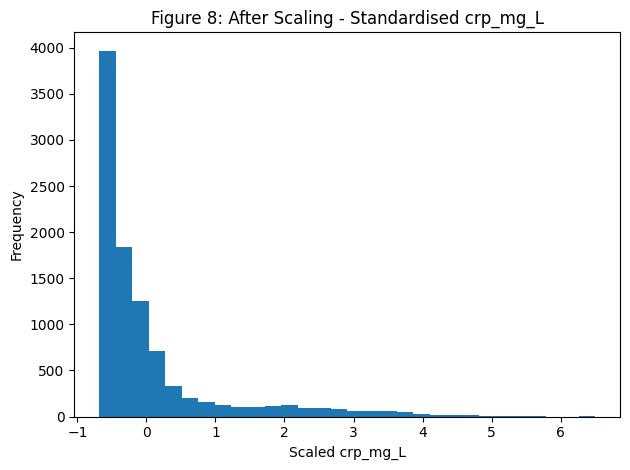

In [82]:
# Only run this section if we successfully selected a numeric demo feature
if demo_num:
    # Locate the scaled demo_num column in transformed output
    idx = [i for i, name in enumerate(feature_names) if name.endswith(f"num__{demo_num}")]
    # Use the first match if found; otherwise default to 0 to prevent crashing
    col_idx = idx[0] if idx else 0

    # Convert sparse slice to dense if needed
    # Extract the transformed (scaled) values for the chosen numeric feature
    demo_vals = X_train_t[:, col_idx]
    # If the output is sparse, convert to dense for calculations and plotting
    if hasattr(demo_vals, "toarray"):
        demo_vals = demo_vals.toarray().ravel()
    else:
        demo_vals = np.array(demo_vals).ravel()

    # Print header to show this is the After scaling validation
    print(f"\n=== After Scaling check for {demo_num} (train set) ===")
     # Mean should be close to 0 after StandardScaler
    print("Mean:", round(demo_vals.mean(), 3))
    # StdDev should be close to 1 after StandardScaler
    print("StdDev:", round(demo_vals.std(), 3))

    # Visual After scaling distribution
    plt.figure()
    # bins=30 provides clear granularity
    plt.hist(demo_vals, bins=30)
    plt.title(f"Figure 8: After Scaling - Standardised {demo_num}")
    plt.xlabel(f"Scaled {demo_num}")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [83]:
# Only run this if smoking_status exists in dataset
if "smoking_status" in X.columns:
    # Identify all one-hot encoded columns created from smoking_status
    # These appear in feature_names after preprocessing
    encoded_cols = [f for f in feature_names if "smoking_status" in f]
    print("\n=== After Encoding: smoking_status one-hot columns ===")
    # Print the new encoded binary feature names
    print(encoded_cols)


=== After Encoding: smoking_status one-hot columns ===
['cat_other__smoking_status_Current', 'cat_other__smoking_status_Former', 'cat_other__smoking_status_Never']


# - Task 3: Model Training

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1) Split dataset into training/testing sets + justification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% testing, 80% training
    random_state=42,
    stratify=y            # preserve class proportions
)

# Print the shapes of train and test sets
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
# Print class proportions in training set (should match overall distribution)
# normalize=True returns proportions rather than raw counts
print("\nTrain class proportions:\n", y_train.value_counts(normalize=True).round(3))
# Print class proportions in test set to confirm stratified split worked correctly
print("\nTest class proportions:\n", y_test.value_counts(normalize=True).round(3))

Train shape: (9600, 30) Test shape: (2400, 30)

Train class proportions:
 disease_type
Healthy        0.354
COPD           0.179
Asthma         0.164
Pneumonia      0.155
Lung Cancer    0.148
Name: proportion, dtype: float64

Test class proportions:
 disease_type
Healthy        0.354
COPD           0.179
Asthma         0.164
Pneumonia      0.155
Lung Cancer    0.148
Name: proportion, dtype: float64


In [85]:
# 2) Build preprocessing (same for all models = fair comparison)
# Identify categorical columns (text/object) from training data
cat_cols = X_train.select_dtypes(include="object").columns.tolist()
# Identify numerical columns (int + float) from training data
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Special handling for family_history: missing is meaningful -> "None"
cat_fh = ["family_history"] if "family_history" in cat_cols else []
# Other categorical columns excluding family_history
cat_other = [c for c in cat_cols if c not in cat_fh]

# Build preprocessing pipelines
# Numeric pipeline:
num_pipe = Pipeline(steps=[
    # fill missing numeric values using median
    ("imputer", SimpleImputer(strategy="median")),
    # standardise numeric features (mean=0, std=1)
    ("scaler", StandardScaler())
])

# Categorical pipeline (general):
cat_other_pipe = Pipeline(steps=[
    # fill missing categorical with most common value
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # convert categories to one-hot features
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Categorical pipeline for family_history:
cat_fh_pipe = Pipeline(steps=[
    # treat missing as "None"
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    # one-hot encode the categories
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine numeric and categorical transformations into a single transformer
preprocess = ColumnTransformer(
    transformers=[
        # apply numeric pipeline to numeric columns
        ("num", num_pipe, num_cols),
        # apply categorical pipeline to other categorical columns
        ("cat_other", cat_other_pipe, cat_other),
        # apply special family_history pipeline (if exists)
        ("cat_fh", cat_fh_pipe, cat_fh)
    ],
    remainder="drop"
)

In [34]:
# 3) Define models (Default hyperparameters) + justification
# Use Default hyperparameters for initial training (before tuning)
models = {
    "Logistic Regression (default)": LogisticRegression(),
    "SVM (RBF, default)": SVC(),
    "Decision Tree (default)": DecisionTreeClassifier(),
    "Random Forest (default)": RandomForestClassifier(),
    "KNN (default)": KNeighborsClassifier(),
    "Gradient Boosting (default)": GradientBoostingClassifier()
}

In [86]:
# 4) Record initial hyperparameters (before tuning)
print("\n==============================")
print("Initial Hyperparameters (Default)")
print("==============================")

# Dictionary to store hyperparameters for each model
initial_params = {}
# Loop through each model definition
for name, model in models.items():
    # Extract parameter dictionary for the model
    params = model.get_params()
    # Store full parameter set for saving/export
    initial_params[name] = params
    # Print a subset neatly
    print(f"\n{name}")
    # print first 20 keys for readability
    for k in sorted(params.keys())[:20]:
        print(f"  {k}: {params[k]}")

# saving full hyperparameters to a CSV
pd.DataFrame(initial_params).T.to_csv("initial_hyperparameters.csv")


Initial Hyperparameters (Default)

Logistic Regression (default)
  C: 1.0
  class_weight: None
  dual: False
  fit_intercept: True
  intercept_scaling: 1
  l1_ratio: None
  max_iter: 100
  multi_class: deprecated
  n_jobs: None
  penalty: l2
  random_state: None
  solver: lbfgs
  tol: 0.0001
  verbose: 0
  warm_start: False

SVM (RBF, default)
  C: 1.0
  break_ties: False
  cache_size: 200
  class_weight: None
  coef0: 0.0
  decision_function_shape: ovr
  degree: 3
  gamma: scale
  kernel: rbf
  max_iter: -1
  probability: False
  random_state: None
  shrinking: True
  tol: 0.001
  verbose: False

Decision Tree (default)
  ccp_alpha: 0.0
  class_weight: None
  criterion: gini
  max_depth: None
  max_features: None
  max_leaf_nodes: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 2
  min_weight_fraction_leaf: 0.0
  monotonic_cst: None
  random_state: None
  splitter: best

Random Forest (default)
  bootstrap: True
  ccp_alpha: 0.0
  class_weight: None
  cri

In [87]:
# 5) Train each model on training set (using same preprocessing)
trained_models = {}

print("\n==============================")
print("Training models (default hyperparameters)")
print("==============================")

# Train each model with the same preprocessing for fair comparison
for name, model in models.items():
    # Each model is trained with identical preprocessing to ensure fair comparison
    pipe = Pipeline(steps=[
        # apply preprocessing steps
        ("preprocess", preprocess),
        # train classifier
        ("model", model)
    ])
    # Fit pipeline on training data (learn preprocessing + train model)
    pipe.fit(X_train, y_train)
    # Store trained pipeline for later evaluation
    trained_models[name] = pipe
    # Confirm training completion
    print(f"Trained: {name}")

# Final confirmation message
print("\nAll models trained successfully.")


Training models (default hyperparameters)
Trained: Logistic Regression (default)
Trained: SVM (RBF, default)
Trained: Decision Tree (default)
Trained: Random Forest (default)
Trained: KNN (default)
Trained: Gradient Boosting (default)

All models trained successfully.


# - Task 4: Model Evaluation and Visualization

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import shap

# 1) Evaluate all models using accuracy, precision, recall, F1
results = []

for name, pipe in trained_models.items():
    y_pred = pipe.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision_macro": precision_score(y_test, y_pred, average="macro", zero_division=0),
        "Recall_macro": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "F1_macro": f1_score(y_test, y_pred, average="macro", zero_division=0),
    })

results_df = pd.DataFrame(results).sort_values("F1_macro", ascending=False)

print("=== Comparative Evaluation Table (ALL models) ===")
print(results_df)

=== Comparative Evaluation Table (ALL models) ===
                           Model  Accuracy  Precision_macro  Recall_macro  \
0  Logistic Regression (default)  0.937500         0.943820      0.935065   
1             SVM (RBF, default)  0.935833         0.943108      0.930704   
3        Random Forest (default)  0.932917         0.938024      0.929690   
5    Gradient Boosting (default)  0.930417         0.935746      0.927594   
2        Decision Tree (default)  0.879167         0.883047      0.883156   
4                  KNN (default)  0.860000         0.886165      0.835584   

   F1_macro  
0  0.939148  
1  0.936586  
3  0.933634  
5  0.931372  
2  0.882772  
4  0.856316  


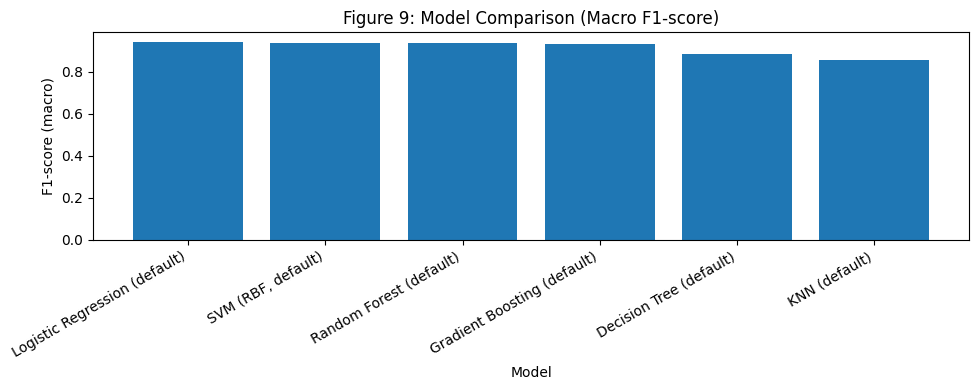

In [38]:
# 2) Visualise comparative results
plt.figure(figsize=(10, 4))
plt.bar(results_df["Model"], results_df["F1_macro"])
plt.title("Figure 9: Model Comparison (Macro F1-score)")
plt.xlabel("Model")
plt.ylabel("F1-score (macro)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [39]:
# 3) Select the best model (highest Macro F1)
best_name = results_df.iloc[0]["Model"]
best_pipe = trained_models[best_name]

print("\nBest model (by Macro F1):", best_name)

# Predictions for best model
y_pred_best = best_pipe.predict(X_test)

print("\n=== Classification report (best model, default params) ===")
print(classification_report(y_test, y_pred_best))


Best model (by Macro F1): Logistic Regression (default)

=== Classification report (best model, default params) ===
              precision    recall  f1-score   support

      Asthma       0.86      0.81      0.83       394
        COPD       0.98      0.96      0.97       429
     Healthy       0.91      0.95      0.93       849
 Lung Cancer       0.99      0.97      0.98       356
   Pneumonia       0.98      0.99      0.98       372

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



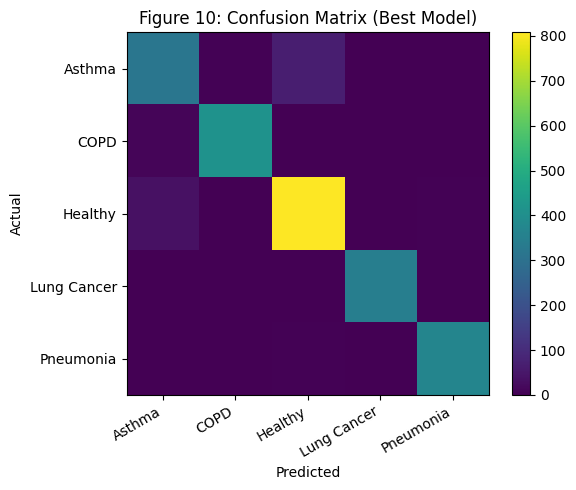

In [40]:
# 4) Confusion Matrix (visual diagnostic)
classes = best_pipe.classes_
cm = confusion_matrix(y_test, y_pred_best, labels=classes)

plt.figure(figsize=(6, 5))
plt.imshow(cm, aspect="auto")
plt.title("Figure 10: Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(len(classes)), classes, rotation=30, ha="right")
plt.yticks(range(len(classes)), classes)
plt.colorbar()
plt.tight_layout()
plt.show()

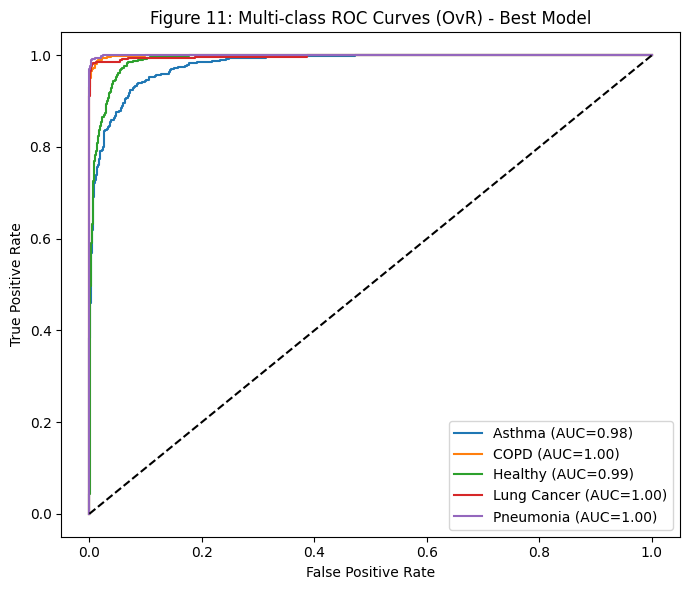

In [41]:
# 5) ROC Curves (One-vs-Rest) (visual diagnostic)
def plot_multiclass_roc(pipe, X_test, y_test, title):
    """Plot OvR ROC curves if model supports predict_proba()."""
    if not hasattr(pipe, "predict_proba"):
        print("ROC skipped: model does not support predict_proba().")
        return

    y_score = pipe.predict_proba(X_test)
    classes = pipe.classes_
    y_test_bin = label_binarize(y_test, classes=classes)

    plt.figure(figsize=(7, 6))
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, label=f"{cls} (AUC={auc(fpr,tpr):.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_multiclass_roc(
    best_pipe, X_test, y_test,
    title="Figure 11: Multi-class ROC Curves (OvR) - Best Model"
)

In [42]:
# 6) Hyperparameter tuning (GridSearchCV) for best model
# Baseline (default) Logistic Regression pipeline for fair before/after comparison
lr_default_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=500, solver="saga", multi_class="multinomial"))
])

lr_default_pipe.fit(X_train, y_train)
pred_lr_default = lr_default_pipe.predict(X_test)

before_metrics = {
    "Accuracy": accuracy_score(y_test, pred_lr_default),
    "Precision_macro": precision_score(y_test, pred_lr_default, average="macro", zero_division=0),
    "Recall_macro": recall_score(y_test, pred_lr_default, average="macro", zero_division=0),
    "F1_macro": f1_score(y_test, pred_lr_default, average="macro", zero_division=0),
}

print("\n=== Logistic Regression Before tuning ===")
print(before_metrics)

# GridSearchCV tuning setup
param_grid = {
    "model__C": [0.01, 0.1, 0.3, 1, 3],
    "model__penalty": ["l2"]
}

grid = GridSearchCV(
    lr_default_pipe,
    param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

lr_tuned_pipe = grid.best_estimator_
pred_lr_tuned = lr_tuned_pipe.predict(X_test)

after_metrics = {
    "Accuracy": accuracy_score(y_test, pred_lr_tuned),
    "Precision_macro": precision_score(y_test, pred_lr_tuned, average="macro", zero_division=0),
    "Recall_macro": recall_score(y_test, pred_lr_tuned, average="macro", zero_division=0),
    "F1_macro": f1_score(y_test, pred_lr_tuned, average="macro", zero_division=0),
}

print("\nBest LR parameters:", grid.best_params_)
print("\n=== Logistic Regression After tuning ===")
print(after_metrics)

# Comparative table: before vs after tuning
compare_df = pd.DataFrame([before_metrics, after_metrics], index=["Before Tuning", "After Tuning"])
print("\n=== Before vs After Tuning Comparison (Logistic Regression) ===")
print(compare_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Before tuning ===
{'Accuracy': 0.9379166666666666, 'Precision_macro': 0.9442993948162914, 'Recall_macro': 0.9356269379144984, 'F1_macro': 0.9396654171982453}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Best LR parameters: {'model__C': 3, 'model__penalty': 'l2'}

=== Logistic Regression After tuning ===
{'Accuracy': 0.9379166666666666, 'Precision_macro': 0.9441065779679182, 'Recall_macro': 0.9356027745702915, 'F1_macro': 0.9395851371861941}

=== Before vs After Tuning Comparison (Logistic Regression) ===
               Accuracy  Precision_macro  Recall_macro  F1_macro
Before Tuning  0.937917         0.944299      0.935627  0.939665
After Tuning   0.937917         0.944107      0.935603  0.939585


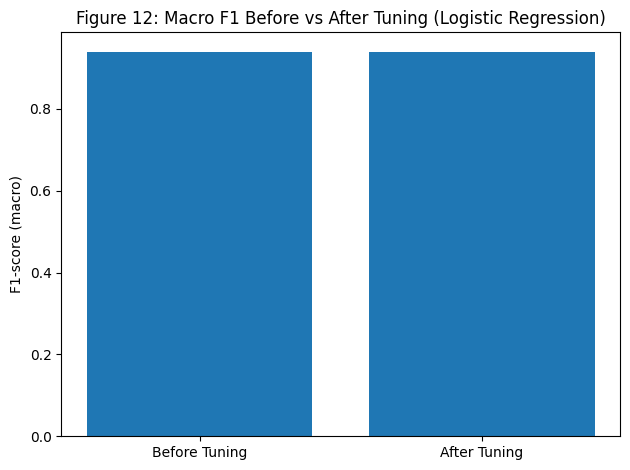

In [56]:
# Visual: before vs after macro F1
plt.figure()
plt.bar(compare_df.index, compare_df["F1_macro"])
plt.title("Figure 12: Macro F1 Before vs After Tuning (Logistic Regression)")
plt.ylabel("F1-score (macro)")
plt.tight_layout()
plt.show()

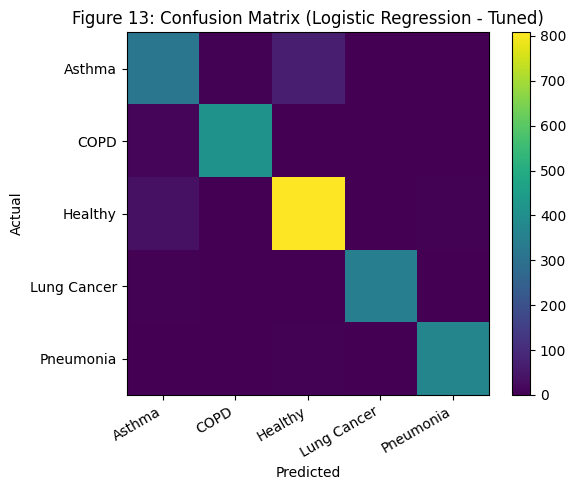

In [44]:
# 7) Confusion matrix + ROC for tuned model (final diagnostics)
# Confusion matrix (tuned)
cm_tuned = confusion_matrix(y_test, pred_lr_tuned, labels=lr_tuned_pipe.classes_)

plt.figure(figsize=(6, 5))
plt.imshow(cm_tuned, aspect="auto")
plt.title("Figure 13: Confusion Matrix (Logistic Regression - Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(range(len(lr_tuned_pipe.classes_)), lr_tuned_pipe.classes_, rotation=30, ha="right")
plt.yticks(range(len(lr_tuned_pipe.classes_)), lr_tuned_pipe.classes_)
plt.colorbar()
plt.tight_layout()
plt.show()

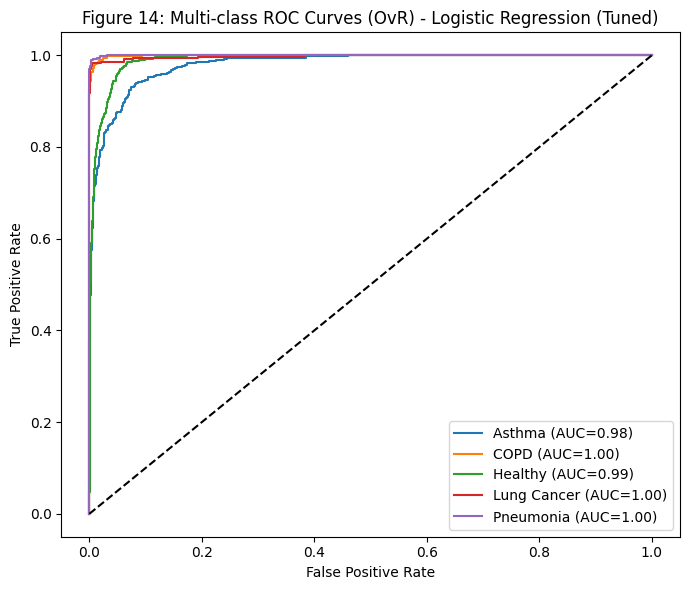

In [45]:
# ROC (tuned)
plot_multiclass_roc(
    lr_tuned_pipe, X_test, y_test,
    title="Figure 14: Multi-class ROC Curves (OvR) - Logistic Regression (Tuned)"
)

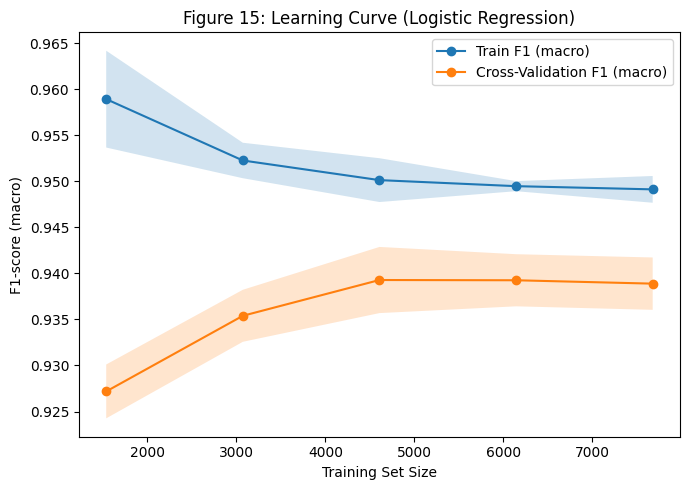

In [58]:
from sklearn.model_selection import learning_curve

# Build pipeline (preprocessing + model)
pipe_lr = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=500,
        # suitable for multinomial + large feature space
        solver="saga",
        multi_class="multinomial",
        random_state=42
    ))
])

# Compute learning curve
# cv=5 ensures robust cross-validation
# scoring='f1_macro' is appropriate for class imbalance
train_sizes, train_scores, val_scores = learning_curve(
    pipe_lr,
    X_train,
    y_train,
    cv=5,
    scoring="f1_macro",
    train_sizes=np.linspace(0.2, 1.0, 5),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Compute mean and standard deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(7, 5))

plt.plot(train_sizes, train_mean, marker="o", label="Train F1 (macro)")
plt.plot(train_sizes, val_mean, marker="o", label="Cross-Validation F1 (macro)")

# Add shaded regions (variance across folds)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.title("Figure 15: Learning Curve (Logistic Regression)")
plt.xlabel("Training Set Size")
plt.ylabel("F1-score (macro)")
plt.legend()
plt.tight_layout()
plt.show()

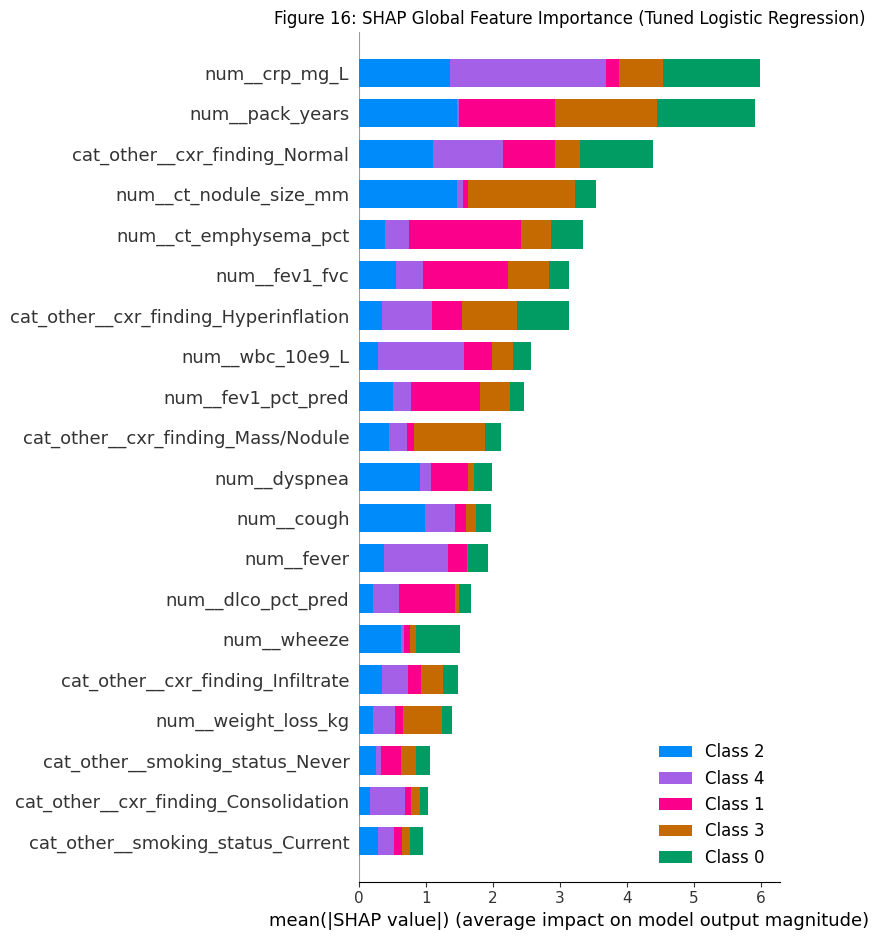

In [60]:
# 8) SHAP interpretation for tuned Logistic Regression
# Extract preprocessor and model
pre = lr_tuned_pipe.named_steps["preprocess"]
clf = lr_tuned_pipe.named_steps["model"]

# Transform datasets
X_train_t = pre.transform(X_train)
X_test_t = pre.transform(X_test)

# Feature names after one-hot encoding + scaling
feature_names = pre.get_feature_names_out()

# Background sample for SHAP (speeds up computation)
rng = np.random.default_rng(42)
bg_size = min(200, X_train_t.shape[0])
bg_idx = rng.choice(X_train_t.shape[0], size=bg_size, replace=False)
X_bg = X_train_t[bg_idx]

# Build SHAP explainer (linear explainer for logistic regression)
explainer = shap.LinearExplainer(clf, X_bg)

# Compute SHAP values for test set
shap_values = explainer(X_test_t)

# Global importance plot (bar)
plt.figure()
shap.summary_plot(
    shap_values,
    features=X_test_t,
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("Figure 16: SHAP Global Feature Importance (Tuned Logistic Regression)")
plt.tight_layout()
plt.show()


Local explanation instance index: 0
Predicted class: COPD


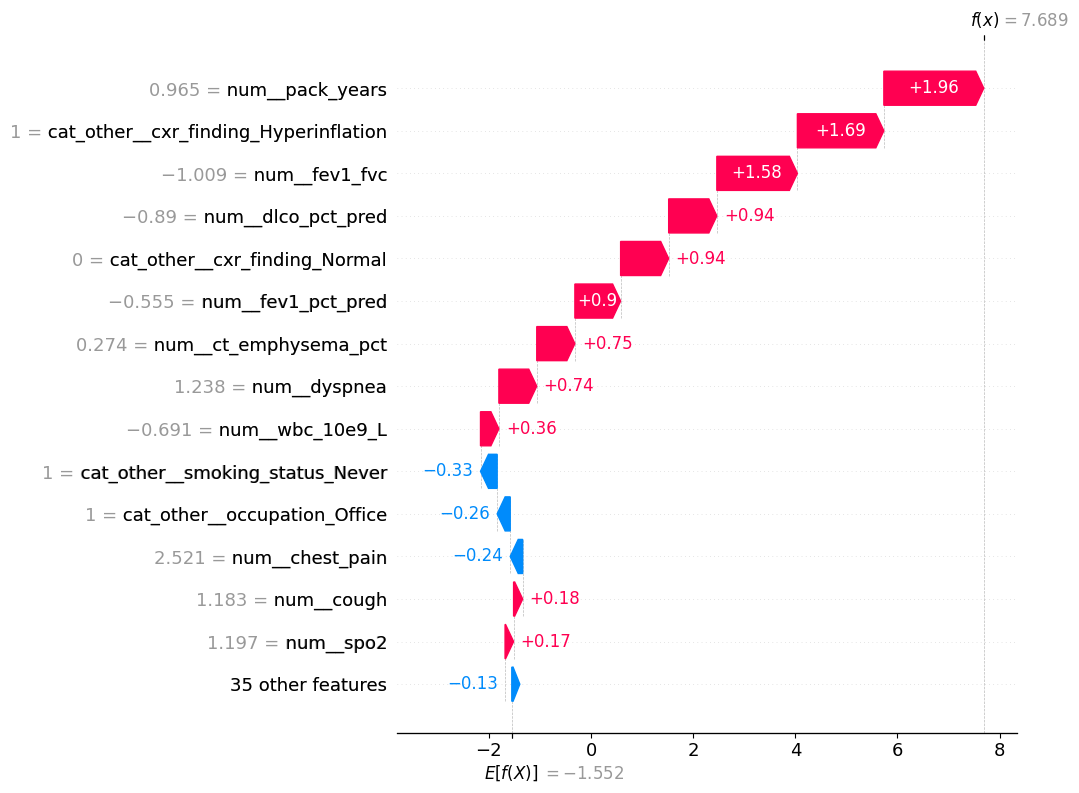

In [61]:
# Local explanation (waterfall for one test instance)
# Pick an instance index
i = 0

# Predict class for selected instance
pred_class = lr_tuned_pipe.predict(X_test.iloc[[i]])[0]
classes = lr_tuned_pipe.classes_
class_idx = list(classes).index(pred_class)

# SHAP values shape for multiclass logistic regression:
# shap_values.values -> (n_samples, n_features, n_classes)
vals = shap_values.values
base = shap_values.base_values

# Extract row data (dense for plotting)
x_row = X_test_t[i]
x_row_dense = x_row.toarray()[0] if hasattr(x_row, "toarray") else np.array(x_row).ravel()

# Create explanation for the predicted class
sv = shap.Explanation(
    values=vals[i, :, class_idx],
    base_values=base[i, class_idx],
    data=x_row_dense,
    feature_names=feature_names
)

print("\nLocal explanation instance index:", i)
print("Predicted class:", pred_class)

shap.plots.waterfall(sv, max_display=15)